In [33]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

# Normalising the data (feature scaling)
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

# Training the model
# Defining the input layer
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

# Defining the hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

#Defining the output layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2636 - acc: 0.9231
Epoch 2/3
60000/60000 [==============================] - 5s 85us/sample - loss: 0.1085 - acc: 0.9663
Epoch 3/3
60000/60000 [==============================] - 5s 91us/sample - loss: 0.0741 - acc: 0.9761


In [34]:
#Testing the model and finding the accuracy
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 1s 62us/sample - loss: 0.0946 - acc: 0.9710
0.09461738405190408 0.971


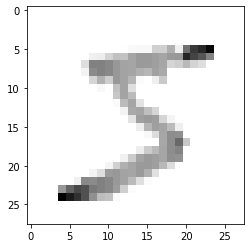

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [35]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap = plt.cm.binary)
plt.show()
print(x_train[0])

In [36]:
#Saving the model
model.save('number_reader.model')

In [37]:
# To reload the model
new_model = tf.keras.models.load_model('number_reader.model')

In [38]:
# To make predictions
predictions = new_model.predict(x_test)

In [39]:
print(predictions)

[[5.5812270e-09 1.5644609e-08 2.3354282e-06 ... 9.9992120e-01
  2.8481024e-08 4.8042392e-07]
 [3.9931758e-10 6.2456133e-04 9.9937254e-01 ... 4.4020673e-08
  1.0962735e-06 3.5671027e-14]
 [1.7511878e-08 9.9974006e-01 1.6585598e-05 ... 9.2130409e-05
  1.3820088e-04 6.1380881e-08]
 ...
 [6.2634170e-10 8.5401602e-08 8.7745450e-11 ... 8.1528569e-06
  9.7440261e-07 1.0059061e-04]
 [1.5662652e-06 1.7087947e-04 1.6978760e-07 ... 3.2179642e-07
  1.9190500e-02 8.4809324e-07]
 [2.2670253e-08 1.8150756e-08 7.9368952e-08 ... 5.6107938e-11
  1.2915119e-07 3.2934808e-11]]


In [42]:
import numpy as np

print(np.argmax(predictions[50]))

6


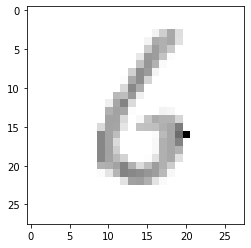

In [45]:
plt.imshow(x_test[50], cmap = plt.cm.binary)
plt.show()